# Importing Necessary libraries

In [1]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install scikit_learn
!pip install tensorflow
!pip install torch
!pip install matplotlib

In [2]:
import re
import nltk
import time
import torch
import string
import numpy as np
import pandas as pd
import torch.nn as nn
# import tensorflow as tf

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# from tensorflow import keras
from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


# Reading the Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#reading data
data = pd.read_csv('/content/drive/My Drive/blogs/lstm-text/Input/review_data (1).csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaN
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28


# Information About Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1500 non-null   object
 1   userName              1500 non-null   object
 2   userImage             1500 non-null   object
 3   content               1500 non-null   object
 4   score                 1500 non-null   int64 
 5   thumbsUpCount         1500 non-null   int64 
 6   reviewCreatedVersion  1500 non-null   object
 7   at                    1500 non-null   object
 8   replyContent          523 non-null    object
 9   repliedAt             523 non-null    object
dtypes: int64(2), object(8)
memory usage: 117.3+ KB


In [10]:
 # Selecting the needed Column

data = data[['content','score']]
data

,content,score
0,Overall it's really an amazing app. I've been ...,4
1,Hey! Yes I gave a 5 star rating... coz I belie...,5
2,Canva used to be a good app! But recently I've...,1
3,"It's a brilliant app, but I have just one prob...",5
4,This was such a great app. I used to make BTS ...,4
...,...,...
1495,Absolutely amazing and a lifesaver for teachers.,5
1496,Very nice but many a times shows error opening...,3
1497,Too much lag. Always stuck on starting page. W...,1
1498,Nice app for all college work. So many feature...,5


# Function to Clean the Text

In [11]:
 # Defining a Function to Clean the Textual Data

def clean_text(txt):

  txt = txt.lower() #Lowering the text
  txt = re.sub(r'\W', ' ', str(txt)) # remove all special characters including apastrophie
  txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations
  txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
  txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters (it's -> it s then we need to remove s)
  txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
  txt = re.sub(r"(http\S+|http)", "", txt) # remove links
  txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stopwords.words('english') ]) # stem & remove stop words
  return txt


# Comparison Between Orginal Text and Processed Text

In [12]:
print('Original Text : ',data['content'][1])
print('Processed Text : ',clean_text(data['content'][1]))

Original Text :  Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤
Processed Text :  hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank


# Applying the Function to the Dataset

In [13]:
data['content'] = data['content'].apply(clean_text) #apply the function to every text in the dataset
data

,content,score
0,overal realli amaz app use past year howev one...,4
1,hey ye gave star rate coz believ deserv mostli...,5
2,canva use good app recent face issu save file ...,1
3,brilliant app one problem edit post doubl tap ...,5
4,great app use make bt meme recent updat abl ch...,4
...,...,...
1495,absolut amaz lifesav teacher,5
1496,nice mani time show error open ppt school proj...,3
1497,much lag alway stuck start page worst app down...,1
1498,nice app colleg work mani featur templat work ...,5


# Distribution of Classes in the dataset

In [14]:
data.score.value_counts()

,count
score,
5,952
4,227
1,170
3,91
2,60


<ipython-input-15-4bb0c7c7d987>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['score']).plot.bar()


<Axes: xlabel='score'>

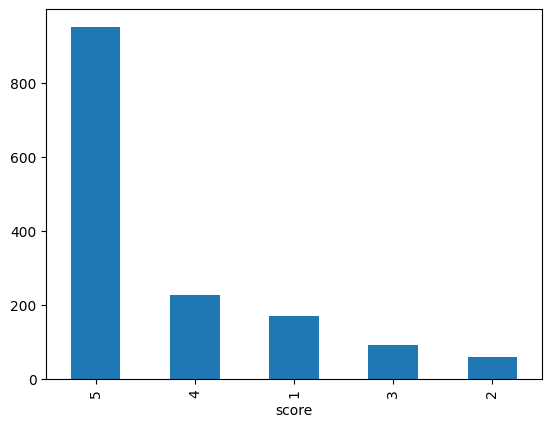

In [15]:
# we can see that class "5"  is dominating in the dataset. Thus we need to Balance the Dataset.

pd.value_counts(data['score']).plot.bar()

# Balancing the Dataset

In [16]:
# First we need to divide the dataset to each classes

df_majority = data[data['score']==5] #Data with class 5

df_minority1= data[data['score']==2] #Data with class 2

df_minority2 = data[data['score']==3] #Data with class 3

df_minority3 = data[data['score']==1] #Data with class 1

df_minority4 = data[data['score']==4] #Data with class 4

# Upasampling the Monority class and Downsampling the Majority Class

In [17]:
#Down Sampling Majority Class "5"
df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples = 600)
#Upsample Minority class  "2"
df_minority_upsampled = resample(df_minority1,
                                 replace=True,
                                 n_samples=200)
#Upsample Minority class "3"
df_minority_upsampled1 = resample(df_minority2,
                                 replace=True,
                                 n_samples=300)
#Upsample Minority class "1"
df_minority_upsampled2 = resample(df_minority3,
                                 replace=True,
                                 n_samples=225)
#Upsample Minority class "4"
df_minority_upsampled3 = resample(df_minority4,
                                 replace=True,
                                 n_samples=250)


# Combine minority class with downsampled majority class
data1 = pd.concat([df_majority_downsampled, df_minority_upsampled,df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3])

In [18]:
data1.score.value_counts()

,count
score,
5,600
3,300
4,250
1,225
2,200


# Now we have a Balanced Dataset

<ipython-input-19-0cb55f9b3a16>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data1['score']).plot.bar()


<Axes: xlabel='score'>

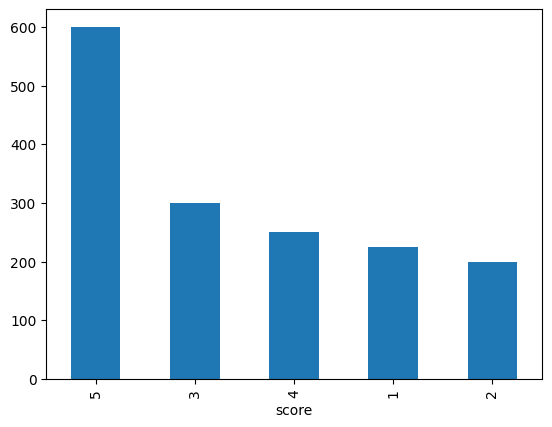

In [19]:
pd.value_counts(data1['score']).plot.bar()

# Defining the Parameters and Tokenizer

In [ ]:
# !pip install tensorflow==2.0.0 --upgrade --force-reinstall

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in each Content.
MAX_SEQUENCE_LENGTH = 600
# This is fixed. Embedding
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data1['content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1350 unique tokens.


In [21]:
 #Tokenizing the content

X = tokenizer.texts_to_sequences(data1['content'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape[1])

Shape of data tensor: 600


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data1['score'])
print(Y.shape)
print(le.classes_)
Y.dtype

(1575,)
[1 2 3 4 5]


dtype('int64')

# Splitting Dataset to Train and Test Data

In [23]:
 #Train and Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1417, 600) (1417,)
(158, 600) (158,)


In [ ]:
# Y_test = torch.Tensor(Y_test.to_numpy())
# Y_test.dtype

In [24]:
 # Converting data into Torch and getting it into CPU

x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(Y_train, dtype=torch.long)
x_cv = torch.tensor(X_test, dtype=torch.long)
y_cv = torch.tensor(Y_test, dtype=torch.long)

# Converting dataset to a Torch Datset

In [25]:
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

In [26]:
# Defing the Parameters:
max_features =  2000
batch_size = 50
vocab_size = max_features

# Initialising the DataLoaders
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

# Defining the Model

In [27]:
class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) : #
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        #self.drop  = nn.Dropout(p=0.2)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)
        self.linear = nn.Linear(64, 5)
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embeddings(x)
        #x = self.drop(x)
        out_pack, (ht, ct) = self.lstm(x)
        out_pack1, (ht, ct) = self.lstm1(out_pack)
        out = self.linear(ht[-1])
        #out = self.softmax(out)
        return out

# Structure of the Model

In [28]:
#intializing model
model = LSTM(vocab_size, 128,64)
print(model)

LSTM(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (lstm): LSTM(128, 64, batch_first=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=5, bias=True)
)


# Model Tranining And Validation

In [29]:
# Defining Train Loop:

n_epochs = 10

loss_fn = nn.CrossEntropyLoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimiser

# model.cuda() # Moving Model Into GPU
# loss_fn.cuda() # Moving Loss Function Into GPU

train_loss = []
valid_loss = []
for epoch in range(n_epochs):
      start_time = time.time()



    # Set model to train configuration
      model.train() # indicator for training
      avg_loss = 0.
      for i, (x_batch, y_batch) in enumerate(train_dl):
#           x_batch = x_batch.cuda()
#           y_batch = y_batch.cuda()


          # Predict/Forward Pass
          y_pred = model(x_batch)



          # Compute loss
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          avg_loss += loss.item() / len(train_dl)




      # Set model to validation configuration
      model.eval() # Indicator for Validation
      avg_val_loss = 0.
      val_preds = np.zeros((len(x_cv),len(le.classes_)))

      for i, (x_batch, y_batch) in enumerate(val_dl):
          y_pred = model(x_batch).detach()
          avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

           #keep/store predictions

          val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()

          # Check Accuracy
      val_accuracy = sum(val_preds.argmax(axis=1)==Y_test)/len(Y_test)
      train_loss.append(avg_loss)
      valid_loss.append(avg_val_loss)
      elapsed_time = time.time() - start_time
      print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))


<ipython-input-29-042ea5481e25>:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()


Epoch 1/10 	 loss=1.5015 	 val_loss=1.4055  	 val_acc=0.3797  	 time=90.13s
Epoch 2/10 	 loss=1.2634 	 val_loss=1.2224  	 val_acc=0.5506  	 time=96.55s
Epoch 3/10 	 loss=1.0375 	 val_loss=1.0145  	 val_acc=0.5949  	 time=68.21s
Epoch 4/10 	 loss=0.8117 	 val_loss=0.8983  	 val_acc=0.6456  	 time=19.34s
Epoch 5/10 	 loss=0.5942 	 val_loss=0.8223  	 val_acc=0.6519  	 time=23.29s
Epoch 6/10 	 loss=0.4337 	 val_loss=0.7481  	 val_acc=0.7025  	 time=93.46s
Epoch 7/10 	 loss=0.3166 	 val_loss=0.7397  	 val_acc=0.7025  	 time=20.84s
Epoch 8/10 	 loss=0.2372 	 val_loss=0.7249  	 val_acc=0.7405  	 time=14.05s
Epoch 9/10 	 loss=0.1761 	 val_loss=0.8042  	 val_acc=0.7405  	 time=13.92s
Epoch 10/10 	 loss=0.1293 	 val_loss=0.8003  	 val_acc=0.7658  	 time=12.78s


#Plotting the Loss

In [30]:
#loss vs epoch graph
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train') # X axis
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation') # Y axis
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

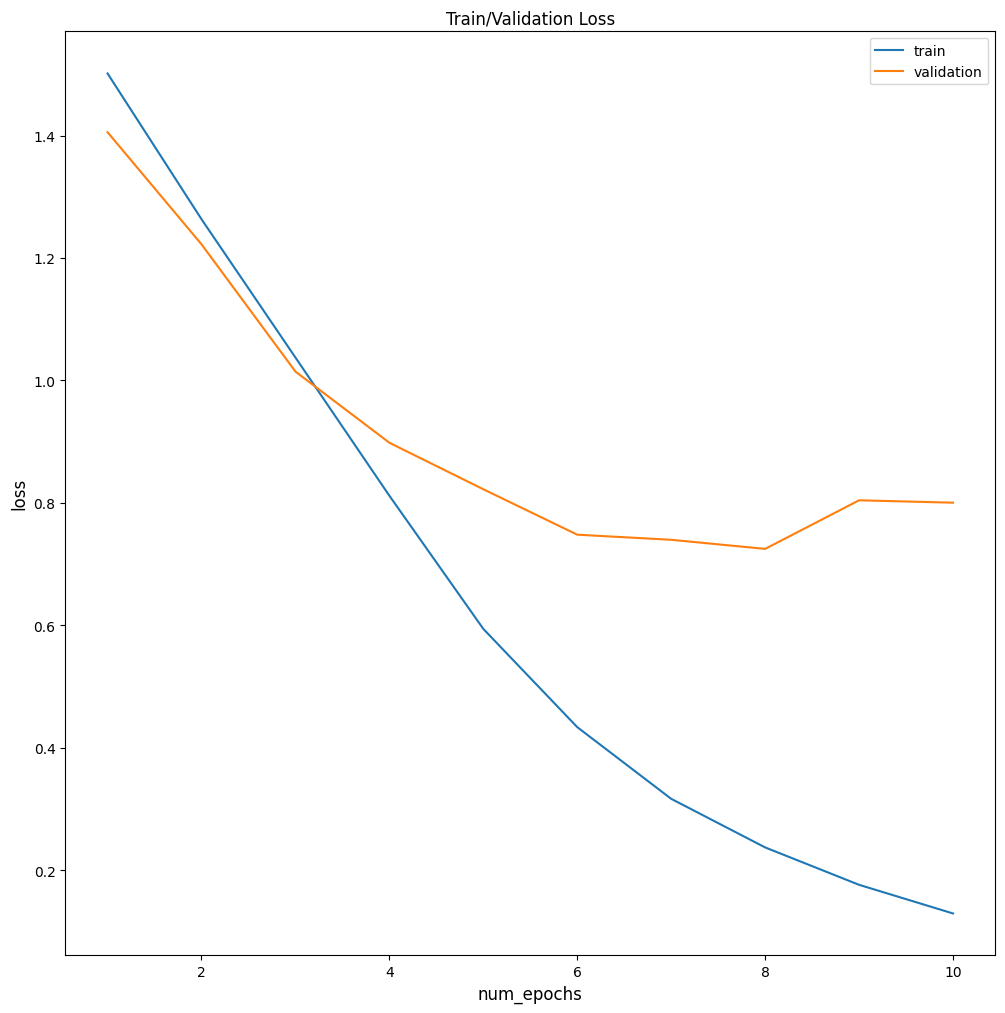

In [31]:
plot_graph(n_epochs)